### Processamento dos dados do ADCP do campo do Leme em 10/10/2018

- Velocity Time Series in mm/s
- Each Column is a Time Series of Velocity for a particular depth cell
- Rows are depth cells (sensors) at a particular time)
- Column Order is: bin1beam1,bin1beam2,bin1beam3,bin1beam4,bin2beam1....binNbeamM
- 2048 Samples, 3 Bins, 4 Beams

In [27]:
import numpy as np
import pandas as pd
from glob import glob
import matplotlib.pyplot as plt
from matplotlib import mlab

In [10]:
pathname = '/home/lioc/Desktop/WAVES/'

list_vel = np.sort(glob(pathname + 'Vel*'))
list_vel

array(['/home/lioc/Desktop/WAVES/Vel2018101007000000.txt',
       '/home/lioc/Desktop/WAVES/Vel2018101008000000.txt',
       '/home/lioc/Desktop/WAVES/Vel2018101009000000.txt',
       '/home/lioc/Desktop/WAVES/Vel2018101010000000.txt',
       '/home/lioc/Desktop/WAVES/Vel2018101011000000.txt',
       '/home/lioc/Desktop/WAVES/Vel2018101012000000.txt',
       '/home/lioc/Desktop/WAVES/Vel2018101013000000.txt',
       '/home/lioc/Desktop/WAVES/Vel2018101014000000.txt',
       '/home/lioc/Desktop/WAVES/Vel2018101015000000.txt',
       '/home/lioc/Desktop/WAVES/Vel2018101016000000.txt',
       '/home/lioc/Desktop/WAVES/Vel2018101017000000.txt',
       '/home/lioc/Desktop/WAVES/Vel2018101018000000.txt'], dtype='<U48')

In [13]:
arq = list_vel[6]
arq

'/home/lioc/Desktop/WAVES/Vel2018101013000000.txt'

In [29]:
df = pd.read_table(arq, comment='%', header=None, sep='\s+',
                   names = ['bin1beam1','bin1beam2','bin1beam3','bin1beam4',
                            'bin2beam1','bin2beam2','bin2beam3','bin2beam4',
                            'bin3beam1','bin3beam2','bin3beam3','bin3beam4'])
df[:3]


,bin1beam1,bin1beam2,bin1beam3,bin1beam4,bin2beam1,bin2beam2,bin2beam3,bin2beam4,bin3beam1,bin3beam2,bin3beam3,bin3beam4
0,-84,-241,-16,-152,-30,-44,-149,-282,-91,75,-171,-388
1,-289,-180,-77,-201,-406,-82,-157,-105,-254,-149,-465,-198
2,-236,-56,-72,-54,-355,131,-84,-100,-263,-324,-285,-212


In [ ]:
#Creation of the filter
cutOff = 1000 # Cutoff frequency
nyq = 0.5 * sf
N  = 6    # Filter order
fc = cutOff / nyq # Cutoff frequency normal
b, a = signal.butter(N, fc)

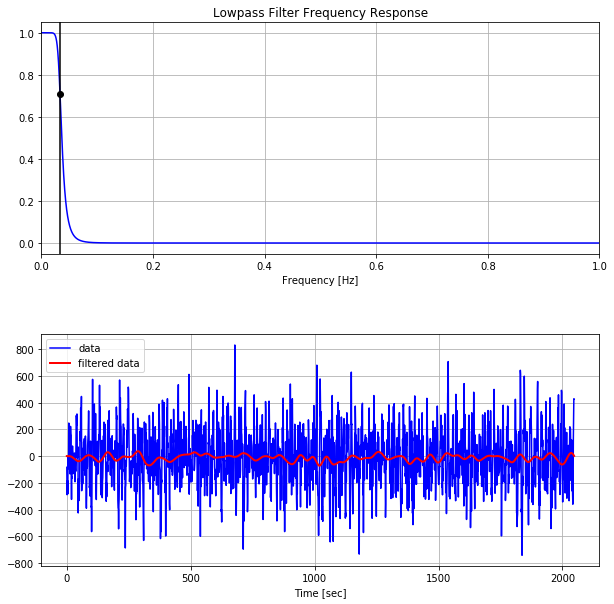

In [52]:
from scipy.signal import butter, lfilter, freqz
import matplotlib.pyplot as plt


def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y


# Filter requirements.
order = 6
fs = 2.0       # sample rate, Hz
cutoff = 1/30.  # desired cutoff frequency of the filter, Hz

# Get the filter coefficients so we can check its frequency response.
b, a = butter_lowpass(cutoff, fs, order)


plt.figure(figsize=(10,10))

# Plot the frequency response.
w, h = freqz(b, a, worN=8000)
plt.subplot(2, 1, 1)
plt.plot(0.5*fs*w/np.pi, np.abs(h), 'b')
plt.plot(cutoff, 0.5*np.sqrt(2), 'ko')
plt.axvline(cutoff, color='k')
plt.xlim(0, 0.5*fs)
plt.title("Lowpass Filter Frequency Response")
plt.xlabel('Frequency [Hz]')
plt.grid()


# Demonstrate the use of the filter.
# First make some data to be filtered.
#T = 5.0         # seconds
#n = int(T * fs) # total number of samples
#t = np.linspace(0, T, n, endpoint=False)
# "Noisy" data.  We want to recover the 1.2 Hz signal from this.
#data = np.sin(1.2*2*np.pi*t) + 1.5*np.cos(9*2*np.pi*t) + 0.5*np.sin(12.0*2*np.pi*t)

data = df.iloc[:,0].values
t = np.arange(len(data))

# Filter the data, and plot both the original and filtered signals.
y = butter_lowpass_filter(data, cutoff, fs, order)

plt.subplot(2, 1, 2)
plt.plot(t, data, 'b-', label='data')
plt.plot(t, y, 'r-', linewidth=2, label='filtered data')
plt.xlabel('Time [sec]')
plt.grid()
plt.legend()

plt.subplots_adjust(hspace=0.35)
plt.show()


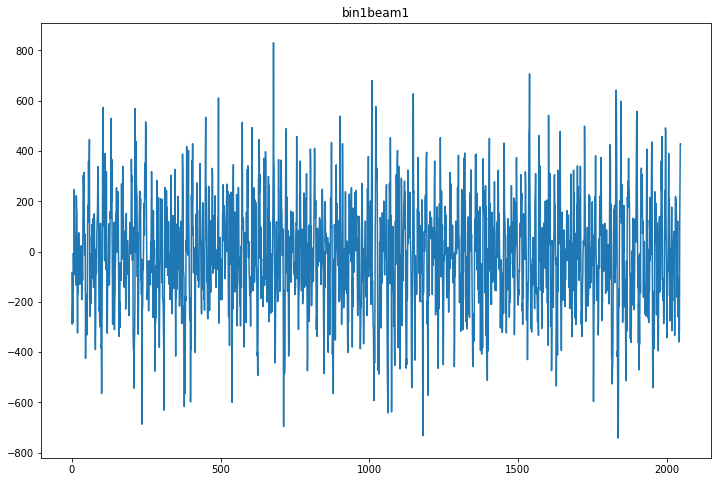

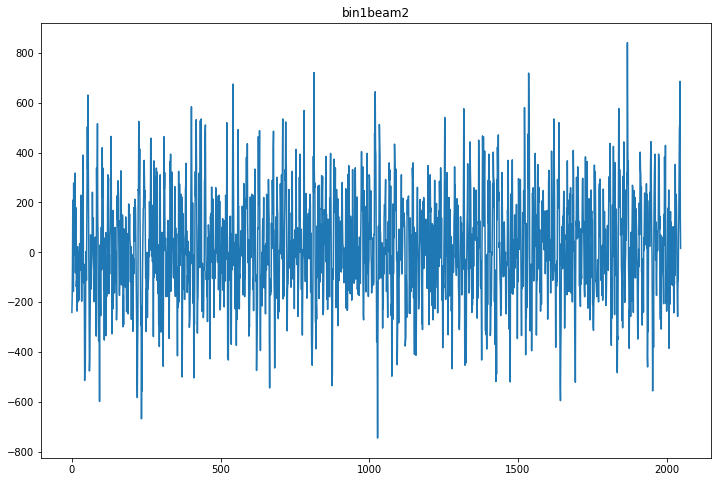

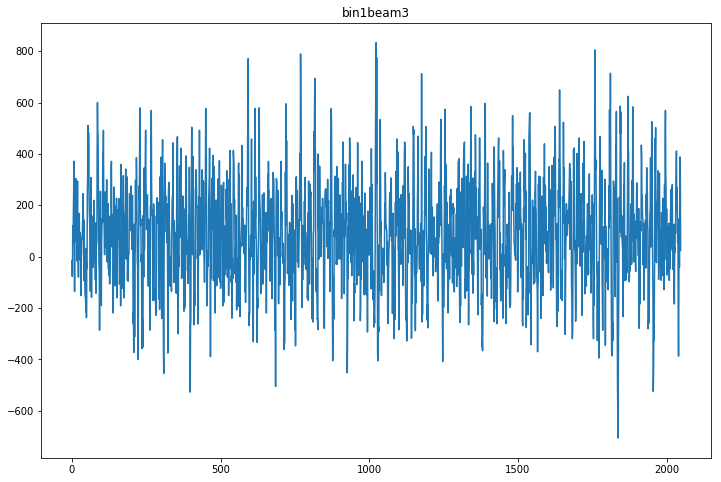

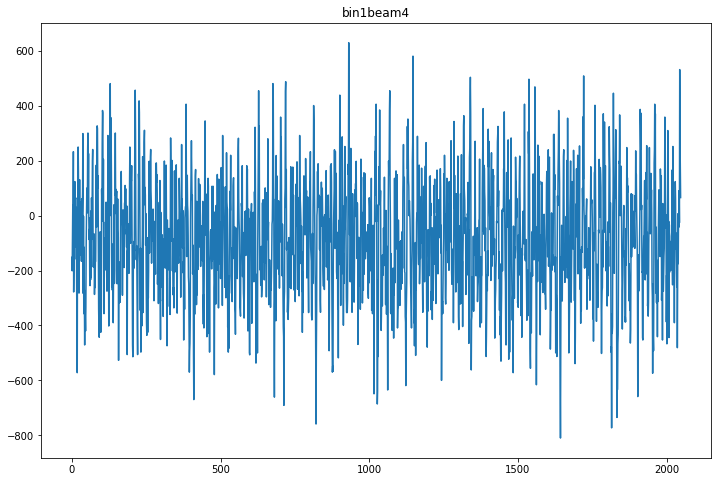

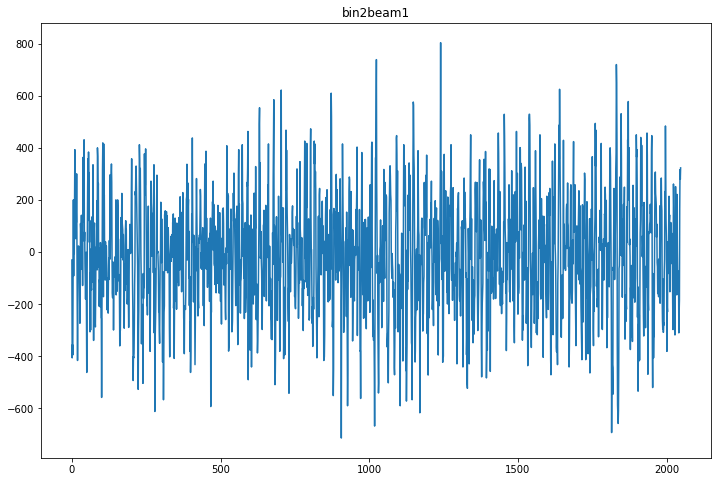

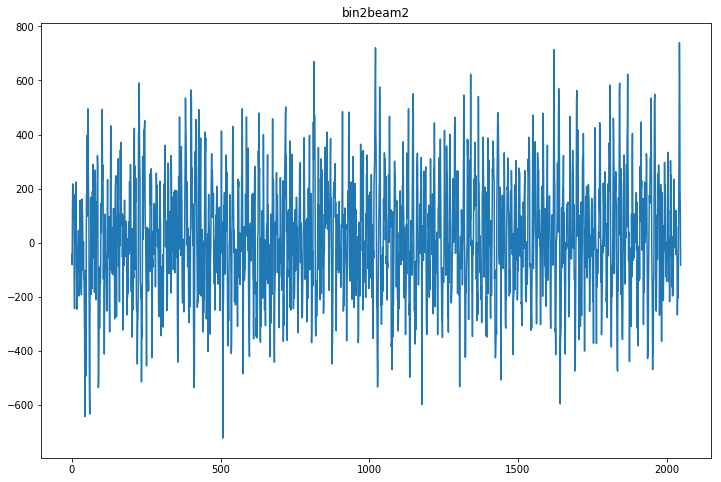

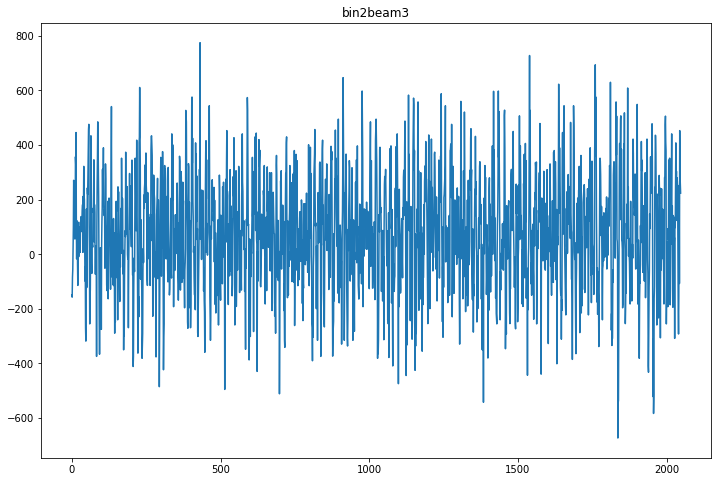

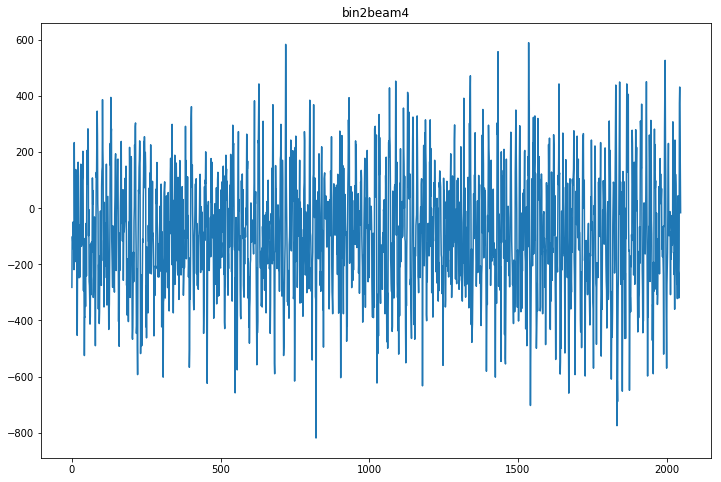

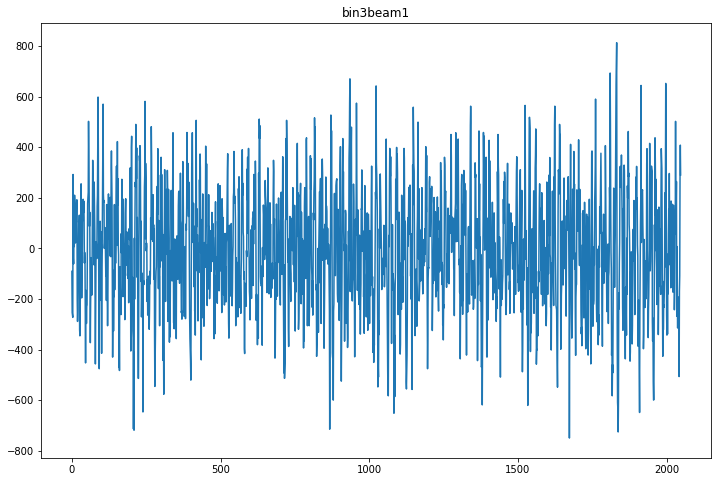

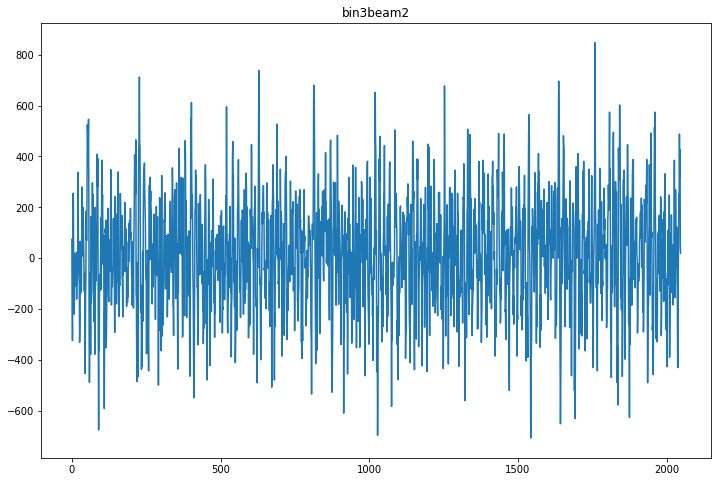

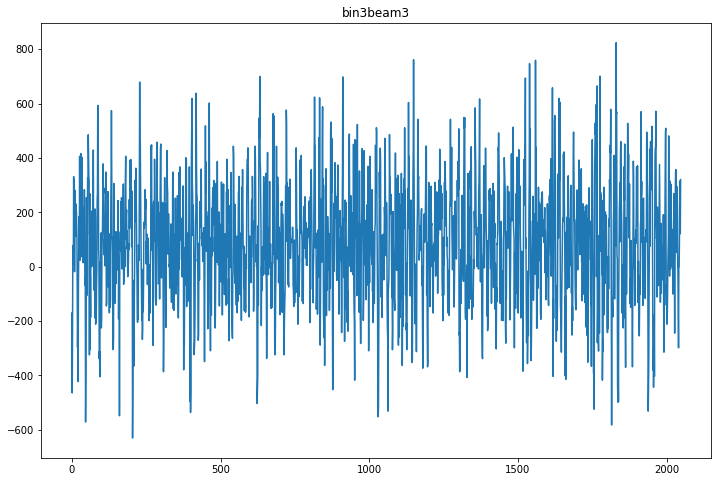

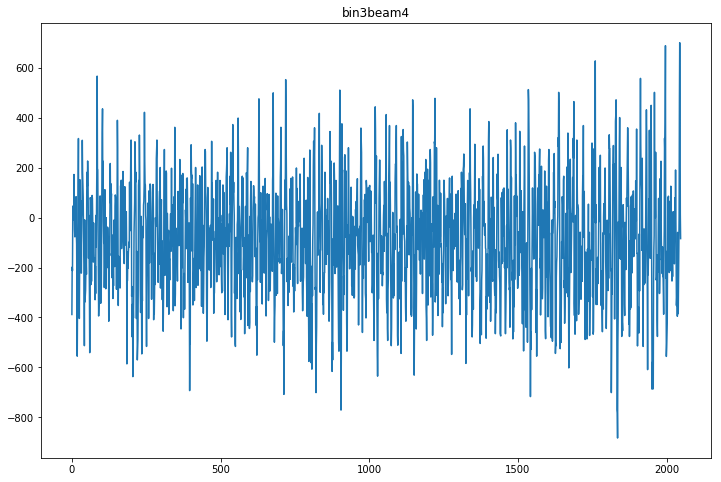

In [35]:

for c in df.columns:
    plt.figure()
    df[c].plot(title=c, figsize=(12,8))#, xlim=(500,600))
plt.show()

### Calculo do espectro

In [ ]:
for c in df.columns:
    spec = mlab.psd(df[c].values, NFFT=nfft['bri'], Fs=fs['bri'],
                     detrend=mlab.detrend_mean, window=mlab.window_hanning,noverlap=nfft['bri']/2)


In [31]:
df.columns

Index(['bin1beam1', 'bin1beam2', 'bin1beam3', 'bin1beam4', 'bin2beam1',
       'bin2beam2', 'bin2beam3', 'bin2beam4', 'bin3beam1', 'bin3beam2',
       'bin3beam3', 'bin3beam4'],
      dtype='object')